In [1]:
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import maximum_filter, minimum_filter

In [2]:
def load_frames_from_video_file(
    path: Path, in_frame: int = 1, out_frame: int = -1
) -> np.ndarray:
    """Load frames from video file."""
    assert in_frame < out_frame or out_frame == -1

    video_capture = cv2.VideoCapture(str(path))
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, in_frame)
    frames = []
    done = False
    while not done:
        success, frame_bgr = video_capture.read()
        if not success:
            break
        frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
        if out_frame > 0 and in_frame + len(frames) >= out_frame:
            break
    video_capture.release()

    return np.array(frames)

In [3]:
in_frame = 1_872
out_frame = 2_072

video_dir = Path("/Volumes/PortableSSD/FRV3F009")
video_file_dusty = video_dir / "FRV3F009 Denoised.mov"
video_file_clean = video_dir / "FRV3F009 Final.mov"

dusty_frames = load_frames_from_video_file(video_file_dusty, in_frame, out_frame)
clean_frames = load_frames_from_video_file(
    video_file_clean, in_frame - 1, out_frame - 1
)

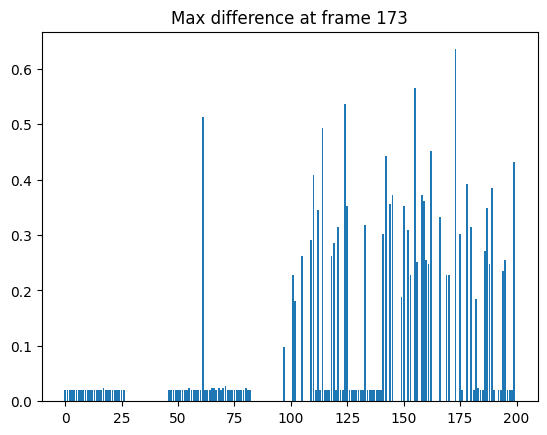

In [4]:
diffs = dusty_frames / 255 - clean_frames / 255
abs_diffs = np.abs(diffs)
frame_max_diffs = np.max(abs_diffs, axis=(1, 2, 3))

plt.bar(np.arange(len(clean_frames)), frame_max_diffs)
plt.title(f"Max difference at frame {np.argmax(frame_max_diffs)}")
plt.show()

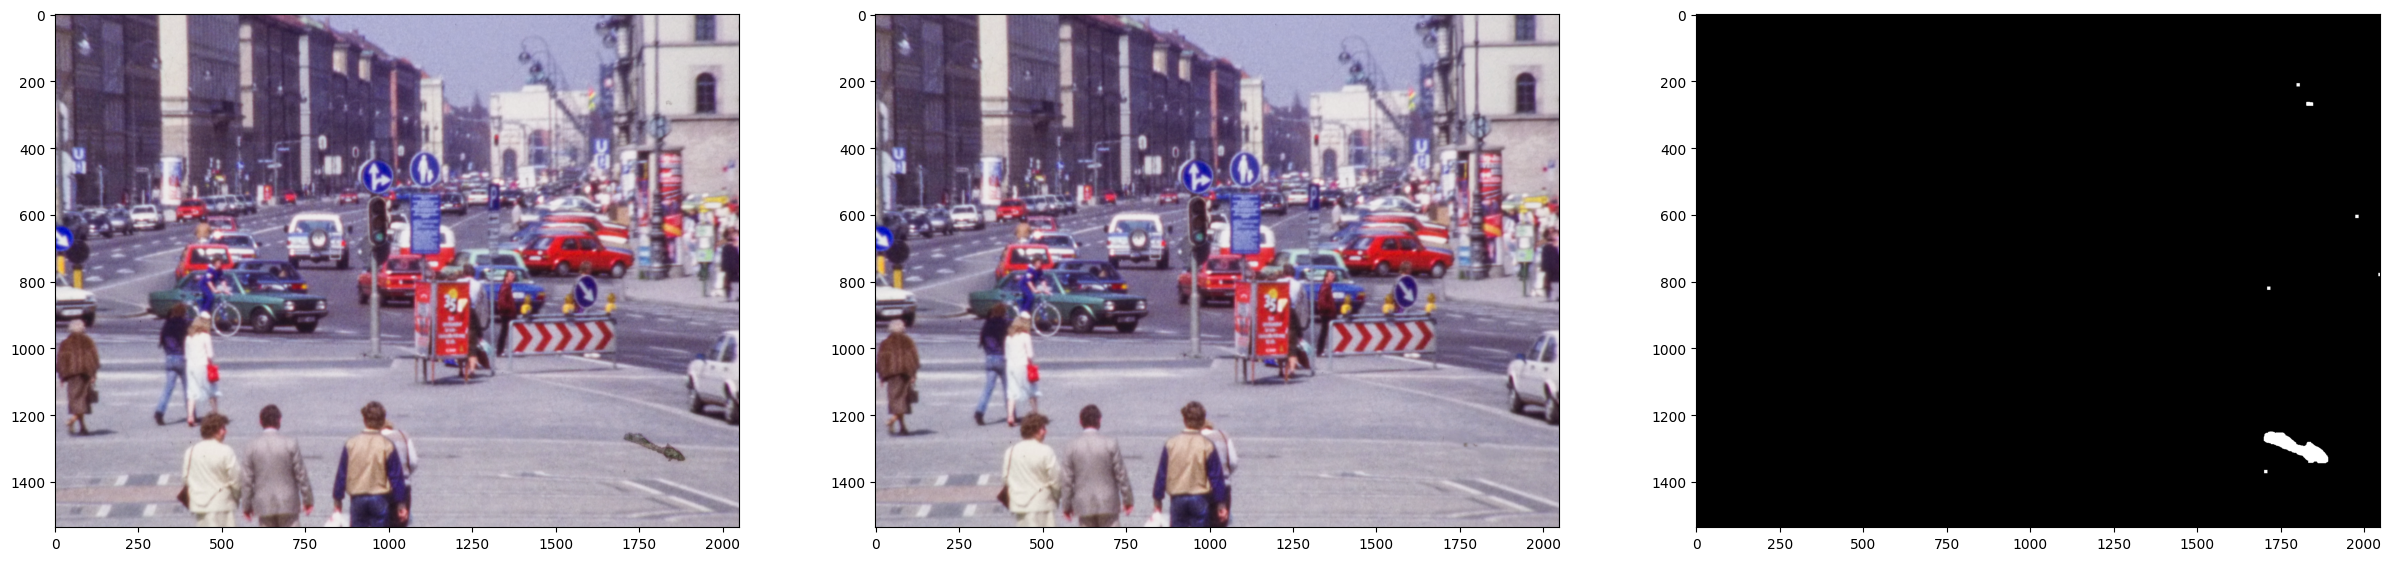

In [5]:
frame_index = 61
threshold = 0.13

diff_frame = clean_frames[frame_index] / 255 - dusty_frames[frame_index] / 255
diff_frame = np.abs(diff_frame)
diff_frame = np.max(diff_frame, axis=2)
diff_frame[diff_frame < threshold] = 0
diff_frame[diff_frame >= threshold] = 1
diff_frame = minimum_filter(diff_frame, size=2)
diff_frame = maximum_filter(diff_frame, size=10)

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.imshow(dusty_frames[frame_index])
plt.subplot(1, 3, 2)
plt.imshow(clean_frames[frame_index])
plt.subplot(1, 3, 3)
plt.imshow(diff_frame, vmin=0, cmap="gray")
plt.show()